# Error Analysis Walkthrough

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

%load_ext autoreload
%autoreload 2

from appearance_bias.feature_extraction import FeatureExtractor, LabelLoader
from appearance_bias.model import Regressor
import os
import pickle
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [3]:
%cd /Users/steed/caliskan/git/learning-appearance-bias

/Users/steed/caliskan/git/learning-appearance-bias


In [4]:
image_dir = "data/maxdistinct"
test_dir = "data/random"
label = "Trustworthy"

In [5]:
# get face embeddings for all the training data
features_train = FeatureExtractor(image_dir).get_features()
features_train_aligned = FeatureExtractor('{}_aligned'.format(image_dir)).get_features()
print(features_train.shape)
print(features_train_aligned.shape)

(13125, 130)
(13125, 130)


In [6]:
# export to TSV for UMAP, TSNE
for trait in ["Trustworthy", "Likeable", "Competent", "Extroverted", "Attractive", "Dominant", "all"]:
    features_trait = features_train_aligned[
        features_train_aligned["Source"] == "25MaxDistinct_{}-FineGrain".format(trait)
    ] if trait != "all" else features_train_aligned
    features = features_trait.loc[:, range(2,130)]
    meta = features_trait.loc[:, "Face name"]
    features.to_csv("output/features/features_{}.tsv".format(trait), sep="\t", header=False)
    meta.to_csv("output/features/meta_{}.tsv".format(trait), sep="\t", header=True)

In [7]:
features

,2,3,4,5,6,7,8,9,10,11,...,120,121,122,123,124,125,126,127,128,129
0,0.048694,-0.390944,-2.244966,1.022856,-0.209081,-0.674991,0.409483,-1.452234,-0.427465,0.256640,...,1.390532,0.090295,1.188529,-0.136220,1.245038,-0.249736,-0.294197,-1.579086,0.539102,-1.808387
1,-0.890641,-1.606654,-1.420017,0.952581,1.434826,-1.758222,-0.345504,-1.148759,0.921016,-1.855385,...,0.000045,1.139906,0.735734,-0.250533,-0.166246,-0.435355,-0.752365,-0.277353,-0.245210,0.625526
2,-0.690573,-0.576943,-1.329103,0.006544,2.128360,-1.959849,0.984097,-2.247301,0.145223,-1.559443,...,0.212909,2.260542,1.014522,0.710367,0.997533,-0.692450,-1.506665,-1.223432,-0.270594,-0.087717
3,-1.511578,-1.327390,-0.130453,-0.671067,-0.009634,-0.021833,-1.002791,-1.159268,0.991752,-2.188404,...,0.928042,0.751925,0.491605,0.125481,2.459817,-1.981282,0.319000,-0.901317,1.348657,-0.610905
4,-0.554482,-1.057734,-1.516527,0.446714,0.996501,-1.143007,0.595606,-2.186642,0.079469,-0.747549,...,0.694656,1.128079,0.495504,-0.248505,1.859594,-0.677621,0.268413,-0.948511,1.619764,-1.213411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13120,-1.121135,-0.458859,-0.652499,1.105912,0.654693,-0.135747,-0.433184,0.225658,-0.936771,-1.372324,...,-0.197747,-0.920236,-0.062899,-0.167897,1.544908,-1.127662,-0.676269,0.371936,1.345261,-0.981193
13121,-0.183567,0.243871,-1.277847,0.054942,0.820147,-1.288079,-1.110074,-1.089539,-0.978924,0.138217,...,-1.015865,-0.521079,-0.160595,-0.768499,1.324307,-1.207439,-1.684744,-0.357238,0.672012,-1.235850
13122,-1.084055,-0.434307,-0.695657,1.141159,0.699064,-0.097911,-0.399049,0.282125,-1.006732,-1.309568,...,-0.135714,-0.974439,-0.165496,-0.202847,1.551036,-1.072235,-0.673533,0.277771,1.347217,-0.905986
13123,-0.884100,-0.186032,-0.217397,0.987769,0.761247,-1.036332,0.357278,-1.077801,-0.348591,-1.424950,...,-0.266439,0.420935,-0.319512,0.158056,1.913293,-0.512591,-1.152222,-0.120359,0.575184,-1.269982


In [8]:
labels = LabelLoader(image_dir).get_labels()
labels

,Face name,Likeable,Extroverted,Threatening,Trustworthy,Attractive,Dominant,Competent
0,EastAsian24_Likeable (300 faces)_+150,150.0,NaN,NaN,NaN,NaN,NaN,NaN
1,EastAsian12_Likeable (300 faces)_-175,-175.0,NaN,NaN,NaN,NaN,NaN,NaN
2,EastAsian02_Likeable (300 faces)_-275,-275.0,NaN,NaN,NaN,NaN,NaN,NaN
3,EastAsian03_Likeable (300 faces)_-200,-200.0,NaN,NaN,NaN,NaN,NaN,NaN
4,EastAsian13_Likeable (300 faces)_-100,-100.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
13120,Black01_Competence_-300,NaN,NaN,NaN,NaN,NaN,NaN,-300.0
13121,Black02_Competence_-100,NaN,NaN,NaN,NaN,NaN,NaN,-100.0
13122,Black23_Competence_+125,NaN,NaN,NaN,NaN,NaN,NaN,125.0
13123,Black19_Competence_+200,NaN,NaN,NaN,NaN,NaN,NaN,200.0


## Embedding Importance

First task: which features in the embedding are most influential for a) regression and b) classification?

In [9]:
from appearance_bias.api import Regressor

df = Regressor.merge_x_y(features_train, labels)
df_aligned = Regressor.merge_x_y(features_train_aligned, labels)
df.describe()

,Likeable,Extroverted,Threatening,Trustworthy,Attractive,Dominant,Competent,2,3,4,...,120,121,122,123,124,125,126,127,128,129
count,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,13125.000000,13125.000000,13125.000000,...,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000
mean,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.903094,0.359057,-0.968057,...,0.509817,2.238834,0.661619,-0.617542,0.891189,-1.070979,-0.833931,-0.460044,-0.504891,-1.123205
std,180.325657,180.325657,180.325657,180.325657,180.325657,180.325657,180.325657,0.587511,0.626096,0.584469,...,0.809529,0.810131,0.523773,0.559783,0.467370,0.411960,0.690907,0.634299,0.468440,0.651359
min,-300.000000,-300.000000,-300.000000,-300.000000,-300.000000,-300.000000,-300.000000,-3.029902,-1.296981,-2.478814,...,-1.818273,-0.464979,-1.269951,-2.347290,-0.786563,-2.303913,-2.541285,-1.952752,-1.910195,-2.624746
25%,-150.000000,-150.000000,-150.000000,-150.000000,-150.000000,-150.000000,-150.000000,-1.329614,-0.082221,-1.354126,...,-0.008920,1.750085,0.372645,-0.948931,0.587312,-1.328959,-1.378922,-0.944905,-0.814387,-1.608486
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.881804,0.326187,-0.986022,...,0.604658,2.403317,0.719694,-0.582568,0.850965,-1.089368,-0.842147,-0.560742,-0.537051,-1.191476
75%,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,-0.447371,0.793088,-0.607118,...,1.101337,2.837594,1.010552,-0.252885,1.164881,-0.787783,-0.306620,-0.001306,-0.199650,-0.669573
max,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,0.812406,2.507388,1.529982,...,2.433150,4.164338,1.949690,1.208267,2.397628,0.303566,0.915426,1.217809,1.523536,0.567782


In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate, KFold

reg = Regressor(df, label)
reg.fit(split=False)
reg_aligned = Regressor(df_aligned, label)
reg_aligned.fit(split=False)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [11]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
def validate_reg(reg, verbose=True):
    score = cross_validate(reg.reg, reg.X, reg.y, cv=kf, scoring=['explained_variance', 'neg_root_mean_squared_error'])
    if verbose:
        print("Explained Variance = {}".format(score['test_explained_variance'].mean()))
        print("-RMSE = {}".format(score['test_neg_root_mean_squared_error'].mean()))
    return score
validate_reg(reg)

Explained Variance = 0.9833414325436504
-RMSE = -23.31343821302063


{'fit_time': array([7.93341112, 8.04362679, 8.04352427, 7.97731805, 8.01580691,
        8.14155602, 8.02907801, 8.06479621, 8.10987592, 8.22779894]),
 'score_time': array([0.01279402, 0.01251626, 0.01175785, 0.01244617, 0.01209188,
        0.01896501, 0.01172996, 0.01248503, 0.01451707, 0.01499605]),
 'test_explained_variance': array([0.98321975, 0.98120567, 0.98469757, 0.98320455, 0.9838307 ,
        0.98075229, 0.98350253, 0.98211423, 0.98544796, 0.98543908]),
 'test_neg_root_mean_squared_error': array([-24.02840739, -25.62747134, -22.14173997, -24.58522276,
        -23.66114397, -24.69229079, -22.78674971, -23.19325633,
        -20.15270082, -22.26539905])}

In [12]:
validate_reg(reg_aligned)

Explained Variance = 0.9685403510910214
-RMSE = -31.956587052106165


{'fit_time': array([8.23219824, 8.32817316, 8.77691507, 8.12198925, 8.18993497,
        8.09821701, 8.1680851 , 8.11058092, 8.09022117, 8.17678308]),
 'score_time': array([0.01290083, 0.01211405, 0.01362896, 0.01204896, 0.01418614,
        0.0118258 , 0.01179004, 0.01343513, 0.01214099, 0.01196504]),
 'test_explained_variance': array([0.96316687, 0.96832384, 0.97276358, 0.96793795, 0.97001525,
        0.95970051, 0.97107745, 0.96792378, 0.97181358, 0.97268072]),
 'test_neg_root_mean_squared_error': array([-35.60242846, -33.36558059, -29.5444749 , -34.02912063,
        -31.56687746, -35.49937391, -30.18062824, -31.07218394,
        -28.20899964, -30.49620275])}

What do the regression feature importances look like?
> The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

In [13]:
# importance metrics done for the regressor trained on non-aligned images
reg_imp = pd.DataFrame(reg.reg.feature_importances_).sort_values(0, ascending=False)
reg_imp

,0
47,0.435857
27,0.073056
72,0.049344
70,0.036625
21,0.024578
...,...
115,0.000463
39,0.000412
33,0.000365
23,0.000352


Is it the same for classification?

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import copy
from appearance_bias.interpretation import Interpreter

## Trained on non-aligned data ##

# also tried KNN - no difference
# clf = KNeighborsClassifier(n_neighbors=5)
clf = LogisticRegression(max_iter=1000)
X = reg.X
y = reg.y
# convert y to binary
y = Interpreter.binarize(y)
clf.fit(X, y)
cross_val_score(clf, X, y, cv=kf).mean()

0.9583854818523154

In [15]:
## Trained on aligned data ##
clf_aligned = LogisticRegression(max_iter=1000)
X_al = reg_aligned.X
y_al = reg_aligned.y
y_al = Interpreter.binarize(y_al)
clf_aligned.fit(X_al, y_al)
cross_val_score(clf_aligned, X_al, y_al, cv=kf).mean()

0.9520025031289112

In [16]:
# trying other classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

for clf_other in [
    RandomForestClassifier(n_estimators=100),
    LogisticRegression(max_iter=1000),
    SVC()
]:
    print(clf_other)
    clf_other.fit(X_al, y_al)
    print("Accuracy: {}".format(cross_val_score(clf_other, X_al, y_al, cv=kf).mean()))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy: 0.9632068494709296
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: 0.9520025031289112
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef

Out-of-sample accuracy?
(Trying without normalization in case that's causing a problem - turns out, no difference.)

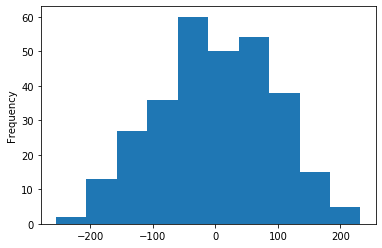

In [17]:
from appearance_bias.feature_extraction import LabelLoader

features_test = FeatureExtractor("{}_aligned".format(test_dir)).get_features()
features_test_aligned = FeatureExtractor("{}_aligned".format(test_dir)).get_features()
labels_test = LabelLoader("{}_aligned".format(test_dir)).get_labels().dropna()
df_test = Regressor.merge_x_y(features_test_aligned, labels_test)
labels_test["Trustworthy"].plot.hist()

In [18]:
# export to TSV for UMAP, TSNE
features = df_test.loc[:, range(2,130)]
meta = df_test.loc[:, "Face name":"Extroverted"]
features.to_csv("output/features/features_random.tsv", sep="\t", header=False)
meta.to_csv("output/features/meta_random.tsv", sep="\t", header=True)

In [19]:
X_test = Regressor.make_X(features_test)
X_test_al = Regressor.make_X(features_test_aligned)
y_test = Interpreter.binarize(labels_test[label], threshold=labels_test[label].mean())
labels_test_aligned = Regressor.merge_x_y(features_test_aligned, labels_test)[label]
y_test_al = Interpreter.binarize(labels_test_aligned, threshold=labels_test_aligned.mean())

In [20]:
clf.score(X_test, y_test)

0.4766666666666667

In [21]:
clf_aligned.score(X_test_al, y_test_al)

0.46

In [22]:
cross_val_score(clf, X_test_al, y_test_al, cv=5).mean()

0.4333333333333334

Feature importance?

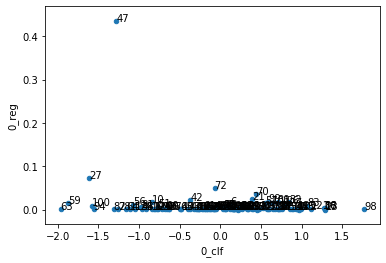

In [23]:
import matplotlib.pyplot as plt

# for random forest
# clf_imp = pd.DataFrame(clf.feature_importances_).sort_values(0, ascending=False)
# for coefs
clf_imp = pd.DataFrame(clf.coef_).transpose().sort_values(0, ascending=False)
imps = clf_imp.join(reg_imp, lsuffix="_clf", rsuffix="_reg")
fig, ax = plt.subplots()
imps.plot("0_clf", "0_reg", kind="scatter", ax=ax)
for k, v in imps.iterrows():
    ax.annotate(k, v)

Observation: the same two embeddings are the most important (10 and 47). Is this true for other labels?

Answer: barely. Not sure that these importances are significant - how can we trace them back to the original images, given that they're embeddings?

Attractive


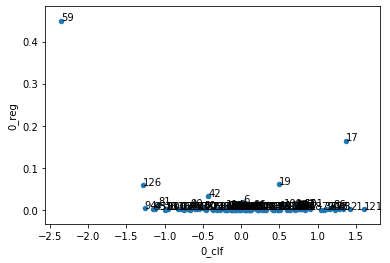

Competent


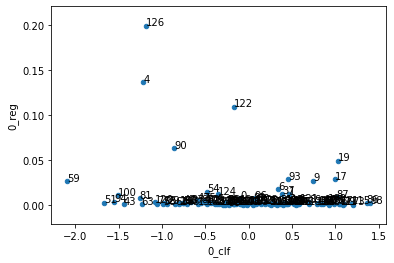

Dominant


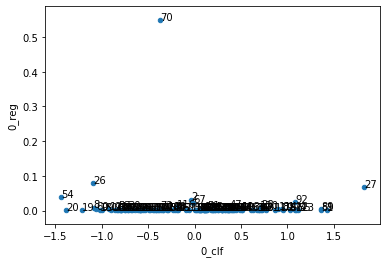

Extroverted


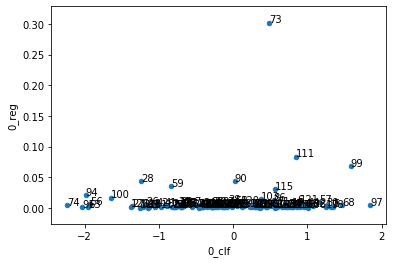

Likeable


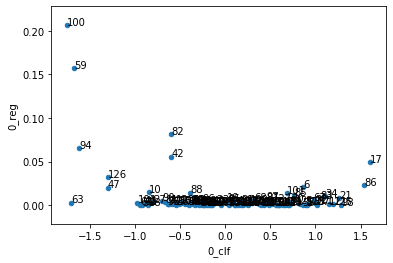

Trustworthy


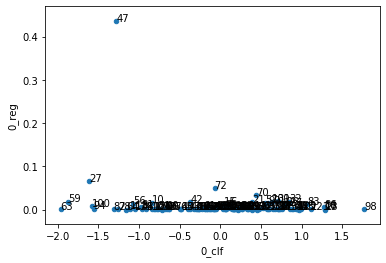

In [24]:
def feature_importance(label):
    reg = Regressor(df, label)
    reg.fit(split=False)
    reg_imp = pd.DataFrame(reg.reg.feature_importances_).sort_values(0, ascending=False)
#     clf = RandomForestClassifier(n_estimators=100)
    clf = LogisticRegression(max_iter=1000)
    X = reg.X
    y = reg.y
    # convert y to binary
    y = (y > 0).astype(int)
    clf.fit(X, y)
    # for random forest
    # clf_imp = pd.DataFrame(clf.feature_importances_).sort_values(0, ascending=False)
    # for coefs
    clf_imp = pd.DataFrame(clf.coef_).transpose().sort_values(0, ascending=False)
    imps = clf_imp.join(reg_imp, lsuffix="_clf", rsuffix="_reg")
    print(label)
    fig, ax = plt.subplots()
    imps.plot("0_clf", "0_reg", kind="scatter", ax=ax)
    for k, v in imps.iterrows():
        ax.annotate(k, v)
    plt.show()
#     return reg_imp, clf_imp
feature_importance("Attractive")
feature_importance("Competent")
feature_importance("Dominant")
feature_importance("Extroverted")
feature_importance("Likeable")
feature_importance("Trustworthy")

### Perturbations

For this section, using an SVC model (best suited, and no need for interpretability like in last section).

In [44]:
from keras.preprocessing import image

interpreter = Interpreter()
interpreter.fit(X_al, y_al)

In [45]:
# a sample image
sample = features_train.sample()
sample_img = interpreter.get_img(*sample[['Face name', 'Source']].values[0], "maxdistinct_aligned", file="png")

(1, 128)


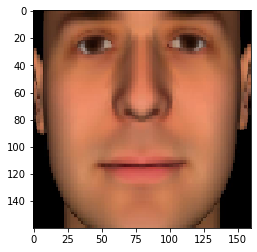

In [46]:
# a sample extraction
from keras.applications.inception_v3 import preprocess_input

img_processed = preprocess_input(image.img_to_array(sample_img)).astype(float)
plt.imshow(img_processed / 2 + 0.5)

# need to load up face net
sample_embedding = interpreter.extraction_model.model.predict(np.array([img_processed]))
print(sample_embedding.shape)

In [47]:
# a sample classification
pred = interpreter.predict_fn(np.array([img_processed]))
pred

array([[0.40795963, 0.59204037]])

/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


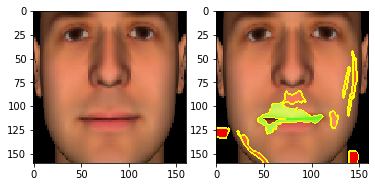

In [48]:
interpreter.explain_img(sample_img, "Trustworthy", num_samples=500)

Now let's try with a variety of images.

# Interpreting 1 images in data/maxdistinct_aligned #
Generating Trustworthy regressor
Extracting training features for data/maxdistinct_aligned...
Extracting labels for data/maxdistinct_aligned...
Fitting interpreter...
Interpreting images...
1/1


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


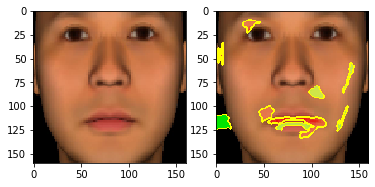

In [68]:
from appearance_bias.api import interpret

interpret('Trustworthy', ['data/maxdistinct_aligned'], 'data/maxdistinct_aligned', n=1, file='png', num_samples=500)

# Interpreting 1 images in data/random_aligned #
Generating Trustworthy regressor
Fitting interpreter...
Interpreting images...
1/1


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


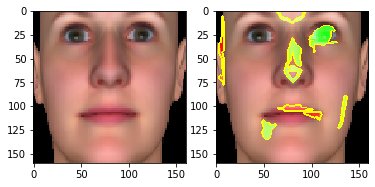

In [69]:
interpret('Trustworthy', ['data/maxdistinct_aligned'], 'data/random_aligned', n=1, file='png', num_samples=500)

**Aligned Todorov Faces**

Do the important features changed when the Todorov faces are cropped and aligned with OpenFace?

In [ ]:
for i in range(3):
    sample = df[df[label].notna()].sample()
    
    print("## WITHOUT ALIGNMENT ##")
    sample_img = interpreter.get_img(*sample[['Face name', 'Source']].values[0], "maxdistinct")
    interpreter.explain_img(sample_img, sample['Face name'].values[0], sample[label].values[0])
    
    print("## WITH ALIGNMENT ##")
    sample_img = interpreterget_img(*sample[['Face name', 'Source']].values[0], "maxdistinct_aligned", file="png")
    interpreter.explain_img(sample_img, sample['Face name'].values[0], sample[label].values[0])

### Test Sets

Let's do feature analysis on our test sets to see if the model considers the same types of features (is it accurately picking out the faces?)

**Races**

# Interpreting 1 images in data/people_all_aligned #
Generating Trustworthy regressor
Fitting interpreter...
Interpreting images...
1/1


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


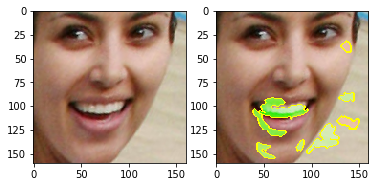

In [82]:
interpret(
    'Trustworthy', 
    ['data/maxdistinct_aligned'], 
    'data/people_all_aligned',
    n=1, 
    file='png',
    ground_truth=False,
    num_samples=500
)

**Politicians**

In [16]:
# classification accuracy
features_pol = FeatureExtractor('data/politicians-database_aligned').get_features()
results = pd.read_csv("data/politicians-database/coding.csv")[["Full Label", "Competency"]]
results.columns = ["Face name", "competency_ground"]
results["competency_norm"] = (results["competency_ground"] - results["competency_ground"].mean()) / results["competency_ground"].std()
results = results.set_index("Face name")
joined = features_pol.join(results, on="Face name").dropna()
X_pol = Regressor.make_X(joined.drop(columns=["competency_ground", "competency_norm"]))
y_pol = joined["competency_norm"]
y_pol_bin = Interpreter.binarize(y_pol)

In [17]:
# 'explained_variance', 'neg_root_mean_squared_error'
from sklearn.metrics import explained_variance_score, mean_squared_error

y_pred = reg_aligned.reg.predict(X_pol)
explained_variance_score(y_pred, y_pol)

-0.0008561310243451192

In [18]:
mean_squared_error(y_pred, y_pol, squared=False)

138.00546575176182

In [19]:
clf.score(X_pol, y_pol_bin)

0.5316455696202531

In [32]:
# what about a classifier trained just on politician faces?
cross_val_score(clf, X_pol, y_pol_bin, cv=kf).mean()

0.5925975177304964

# Interpreting 1 images in data/politicians-database_aligned #
Generating Competent regressor
Fitting interpreter...
Interpreting images...
1/1


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


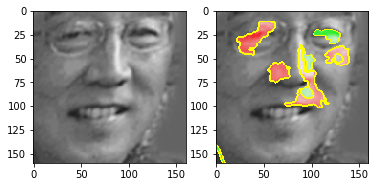

In [88]:
interpret(
    'Competent', 
    ['data/maxdistinct_aligned'], 
    'data/politicians-database_aligned',
    n=1, 
    file='png',
    ground_truth=False,
    num_samples=500
)

**Occupations**

# Interpreting 1 images in data/occupations_aligned #
Generating Trustworthy regressor
Fitting interpreter...
Interpreting images...
1/1


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


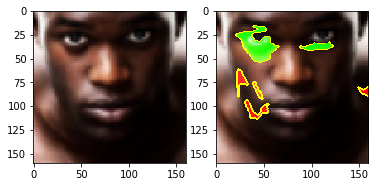

In [98]:
interpret(
    'Trustworthy', 
    ['data/maxdistinct_aligned'], 
    'data/occupations_aligned',
    n=1, 
    file='png',
    ground_truth=False,
    num_samples=500
)

**Average Faces**

# Interpreting 1 images in data/average-faces_aligned #
Generating Trustworthy regressor
Fitting interpreter...
Interpreting images...
1/1


/opt/miniconda3/envs/learning-appearance-bias/lib/python3.6/site-packages/lime/wrappers/scikit_image.py:117: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


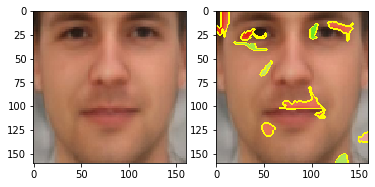

In [100]:
interpret(
    'Trustworthy', 
    ['data/maxdistinct_aligned'], 
    'data/average-faces_aligned',
    n=1,
    file='png',
    ground_truth=False,
    num_samples=500
)

## Error Analysis

### Politician Faces

In [ ]:
errors = pd.read_csv("output/preds/politicians-error.csv", index_col=0, header=0, names=["name", "error", "actual", "pred"])
errors.head(5)

In [ ]:
for outlier in errors.head(5).itertuples():
    print("Error: {}".format(outlier.error))
    print("Actual: {}".format(outlier.actual))
    print("Predicted: {}".format(outlier.pred))
    subdir = "Governors" if outlier.name.startswith("G") else "Senate"
    img = get_img(
        outlier.name, 
        "{}_all_stimuli".format(subdir), 
        "politicians-database_aligned", 
        file="png"
    )
    interpreter.explain_img(img, name="", ground_truth=outlier.actual)

In [ ]:
for outlier in errors.dropna().tail(5).itertuples():
    print("Error: {}".format(outlier.error))
    print("Actual: {}".format(outlier.actual))
    print("Predicted: {}".format(outlier.pred))
    subdir = "Governors" if outlier.name.startswith("G") else "Senate"
    img = get_img(
        outlier.name, 
        "{}_all_stimuli".format(subdir), 
        "politicians-database_aligned",
        file="png"
    )
    interpreter.explain_img(img, name="", ground_truth=outlier.actual)

### Random Faces

Attractive


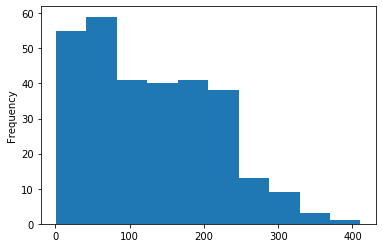

Competent


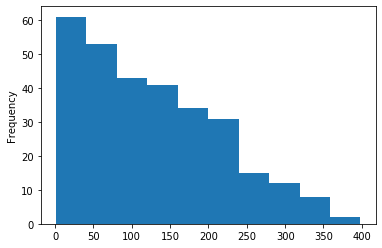

Trustworthy


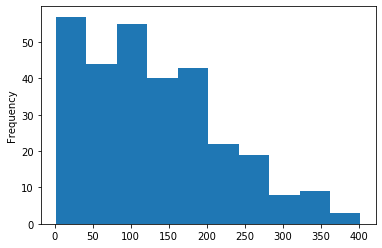

Dominant


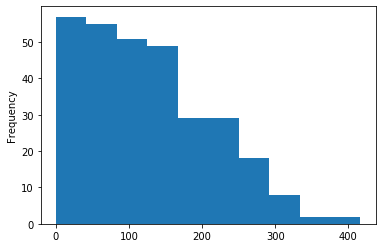

Extroverted


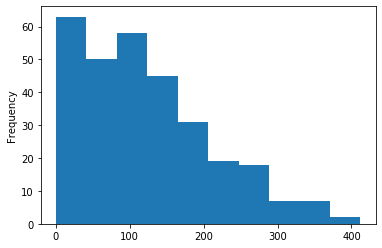

Likeable


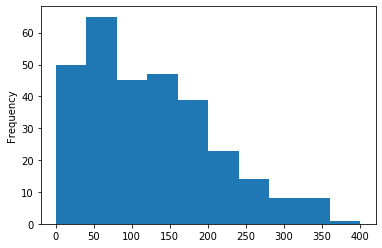

Threatening


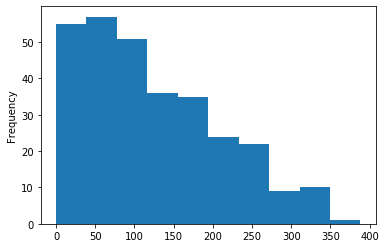

In [30]:
for label in LabelLoader.base_labels:
    print(label)
    labels_test = LabelLoader("data/random_aligned").get_labels(normalization=True).dropna()
    errors = Regressor.merge_x_y(features_test_aligned, labels_test[["Face name", label]])[["Face name", label]]
    errors['name'] = errors['Face name']
    errors["actual"] = errors[label]
    errors["pred"] = reg_aligned.predict(Regressor.make_X(features_test_aligned))
    errors["error"] = abs(errors["actual"] - errors["pred"])
    errors = errors.sort_values("error", ascending=False).drop(columns=[label, 'Face name'])
    errors["error"].plot.hist()
    plt.show()

In [35]:
for outlier in errors.head(5).itertuples():
    print(outlier.name)
    print("Error: {}".format(outlier.error))
    print("Actual: {}".format(outlier.actual))
    print("Predicted: {}".format(outlier.pred))

f42887_e_026
Error: 388.372136205036
Actual: 185.62213620503599
Predicted: -202.75
f42887_e_201
Error: 346.8684712537371
Actual: -87.11847125373706
Predicted: 259.75
f42887_e_102
Error: 345.20956605017375
Actual: -136.70956605017375
Predicted: 208.5
f42887_e_065
Error: 339.91253541618187
Actual: 150.91253541618187
Predicted: -189.0
f42887_e_165
Error: 338.2525393548558
Actual: -131.75253935485583
Predicted: 206.5


In [37]:
for outlier in errors.tail(5).itertuples():
    print(outlier.name)
    print("Error: {}".format(outlier.error))
    print("Actual: {}".format(outlier.actual))
    print("Predicted: {}".format(outlier.pred))

f42887_e_107
Error: 2.343703628653355
Actual: -22.656296371346645
Predicted: -25.0
f42887_e_057
Error: 2.2344031526182135
Actual: -42.48440315261821
Predicted: -40.25
f42887_e_110
Error: 0.6392510268717273
Actual: 2.1392510268717273
Predicted: 1.5
f42887_e_015
Error: 0.03934309206351827
Actual: 205.46065690793648
Predicted: 205.5
f42887_e_240
Error: 0.020745034454268563
Actual: 17.02074503445427
Predicted: 17.0


## Interactive View of LIME Analysis

### Random Faces

In [38]:
from IPython.display import Image
from ipywidgets import interact, SelectionSlider, Layout
from appearance_bias.api import get_regressor
import os


def format_val(val):
    return "➕" if val else "➖"

def interpret_widget(interpret_dir, label, labels=None):
    reg = get_regressor(label, ["data/maxdistinct_aligned"])
    X = reg.X
    y = reg.y
    reg.fit()

    interpreter = Interpreter()
    interpreter.fit(X, y)

    features = FeatureExtractor(interpret_dir).get_features()
    labels = LabelLoader(interpret_dir).get_labels(normalization=True) if labels is None else labels
    features_interpret = Regressor.merge_x_y(features, labels).dropna(subset=[label])
    features_interpret["pred"] = reg.predict(reg.make_X(features_interpret.drop(columns=labels.columns)))
    features_interpret["pred_bin"] = interpreter.clf.predict(reg.make_X(features_interpret.drop(columns=["pred"]+list(labels.columns))))
    features_interpret["label"] = features_interpret[label]
    features_interpret["label_bin"] = Interpreter.binarize(features_interpret[label])
    features_interpret = features_interpret.sort_values(["pred_bin", "label_bin"])
    
    print("Accuracy: {}".format((features_interpret["pred_bin"] == features_interpret["label_bin"]).sum() / features_interpret.shape[0]))

    widget = SelectionSlider(
        options=list(features_interpret.itertuples(index=False)),
        description='Image: ',
        disabled=False,
        orientation='horizontal',
        readout=True,
        layout=Layout(width='70%')
    )
    
    @interact
    def show_images(face=widget):
        t = face.pred_bin == face.label_bin
        print("{} {} {} - {}".format(
            "✅" if t else "❌", 
            "TRUE" if t else "FALSE", 
            "POSITIVE" if face.pred_bin else "NEGATIVE",
            face._0
        ))
        print("Pred: {}\t(reg: {})".format(
            format_val(face.pred_bin),
            face.pred
        ))
        print("Actual: {}\t(reg: {})".format(
            format_val(face.label_bin),
            face.label
        ))
        display(Image("output/lime/{}/{}.png".format(os.path.basename(interpret_dir), face._0)))

In [41]:
interpret_widget("data/random_aligned", "Trustworthy")

Generating Trustworthy regressor
Accuracy: 0.5533333333333333


interactive(children=(SelectionSlider(description='Image: ', layout=Layout(width='70%'), options=(Pandas(_0='f…

In [43]:
interpret_widget("data/random_aligned", "Threatening")

Generating Threatening regressor
Extracting training features for data/maxdistinct_aligned...
Extracting labels for data/maxdistinct_aligned...
Accuracy: 0.6833333333333333


interactive(children=(SelectionSlider(description='Image: ', layout=Layout(width='70%'), options=(Pandas(_0='f…

In [103]:
results = pd.read_csv("data/politicians-database/coding.csv")[["Full Label", "Competency"]]
results.columns = ["Face name", "competency_ground"]
results["Competent"] = (results["competency_ground"] - results["competency_ground"].mean()) / results["competency_ground"].std()
results = results.set_index("Face name")

interpret_widget("data/politicians-database_aligned", "Competent", labels=results)

Generating Competent regressor
Accuracy: 0.4810126582278481


interactive(children=(SelectionSlider(description='Image: ', layout=Layout(width='70%'), options=(Pandas(_0='G…

## Aggregation

In [1]:
!pip install -e ..

Obtaining file:///Users/steed/caliskan/git/learning-appearance-bias


  Attempting uninstall: appearance-bias
    Found existing installation: appearance-bias 1.0
    Uninstalling appearance-bias-1.0:
      Successfully uninstalled appearance-bias-1.0
  Running setup.py develop for appearance-bias


In [2]:
%cd /Users/steed/caliskan/git/learning-appearance-bias

import pickle
from appearance_bias.interpretation import Interpreter
from appearance_bias.api import get_regressor

reg = get_regressor("Trustworthy", ['data/maxdistinct_aligned'])
X = reg.X
y = reg.y
interpreter = Interpreter()
interpreter.fit(X, y)

with open("output/lime/random_aligned/f42887_e_249.pkl", 'rb') as fid:
    explanation = pickle.load(fid)

/Users/steed/caliskan/git/learning-appearance-bias


Generating Trustworthy regressor


### Example

In [50]:
import numpy as np
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image

img = image.load_img("data/random_aligned/f42887_e_213.png", target_size=interpreter.extraction_model.target_size)
img_processed = preprocess_input(image.img_to_array(img)).astype(float)
pred = interpreter.predict_fn(np.array([img_processed]))

temp, mask = explanation.get_image_and_mask(
    np.argmax(pred), 
    positive_only=False, 
#     num_features=10, 
    hide_rest=True
)

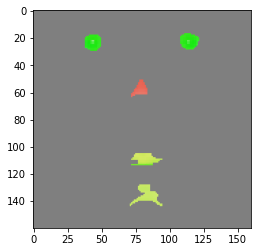

In [51]:
import matplotlib.pyplot as plt

plt.imshow(temp / 2 + 0.5)

### All Images
*300 Random*

In [503]:
import os
from keras.preprocessing import image

def explain_dir(d, num_features=10000):
    explanations = {
        'all': [],
        'temps': [],
        0: [],
        1: []
    }
    images = {
        'all': [],
        0: [],
        1: []
    }
    i = 0
    for subdir, dirs, files in os.walk(d):
        for filename in files:
            filepath = subdir + os.sep + filename
            if filepath.endswith(".pkl"):
                print(i, end=" ")
                basename = os.path.basename(filepath).strip(".pkl")
                extension = "jpg"
                if basename.startswith("G"):
                    subd = "politicians-database/Governors_all_stimuli"
                elif basename.startswith("S"):
                    subd = "politicians-database/Senate_all_stimuli"
                else:
                    subd = "random_aligned"
                    extension = "png"
                imgpath = f"data/{subd}/{basename}.{extension}"
#                 print(imgpath)
                img = image.load_img(imgpath, target_size=interpreter.extraction_model.target_size)
                img_processed = preprocess_input(image.img_to_array(img)).astype(float)
                pred = interpreter.predict_fn(np.array([img_processed]))
                with open(filepath, 'rb') as fid:
                    explanation = pickle.load(fid)
                temp, mask = explanation.get_image_and_mask(
                    np.argmax(pred), 
                    positive_only=False, 
                    num_features=num_features, 
                    hide_rest=True
                )
                explanations['all'].append(mask)
                explanations[np.argmax(pred)].append(mask)
                images['all'].append(img_processed)
                images[np.argmax(pred)].append(img_processed)
                # custom temps
#                 segments = explanation.segments
#                 img = explanation.image
#                 exp = explanation.local_exp[np.argmax(pred)]
#                 mask = np.zeros(segments.shape, segments.dtype)
# #                 if hide_rest:
#                 temp = np.zeros(explanation.image.shape)
# #                 else:
# #                 temp = self.image.copy()
#                 for f, w in exp[:num_features]:
#                     c = 0 if w < 0 else 2
#                     mask[segments == f] = -1 if w < 0 else 1
#                     temp[segments == f] = img[segments == f].copy()
#                     temp[segments == f, c] = np.max(img)
                explanations['temps'].append(temp)
                
                i += 1
    return explanations, images

In [504]:
# for i in range(5):
#     plt.figure()
#     plt.imshow(explanations[i] / 2 + 0.5)
explanations_random, images_random = explain_dir("output/lime/random_aligned")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [585]:
from PIL import Image
import cv2

def plot_aggregate(explanations, images, name, n=None, cmap='bwr_r'):
    
    if n is not None:
        explanations = {k: v[:10] for k, v in explanations.items()}
    
    for subset in ['all', 0, 1]:
        fig, ax = plt.subplots(2, 1)
        ax[0].imshow(np.mean(np.array(images[subset]), axis=(0)) / 2 + 0.5)
        ax[0].axis('off')
        ax[1].imshow(np.mean(np.array(explanations[subset]), axis=(0)), cmap=plt.get_cmap(cmap))
        ax[1].axis('off')
        plt.savefig(f'output/lime/aggregate/{name}_{subset}.png', transparent=True, bbox_inches='tight', pad_inches=0)
        plt.show()
    
        raws = np.mean(np.array(images[subset]), axis=(0))
        masks = np.mean(np.array(explanations[subset]), axis=(0))
        
        masks_rgba = plt.get_cmap(cmap)((masks-masks.min())/(masks.max()-masks.min()))
        masks_rgb = np.array(Image.fromarray(np.uint8(masks_rgba*255)).convert('RGB'))
        images_rgb = np.uint8((raws/2+0.5)*255)
        plt.imshow(cv2.addWeighted(images_rgb, 0.7, masks_rgb, 0.4, -50))
        plt.axis('off')
        plt.savefig(f'output/lime/aggregate/{name}_{subset}_blended.png', transparent=True, bbox_inches='tight', pad_inches=0)
        plt.show()

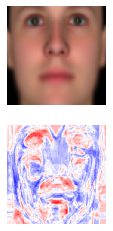

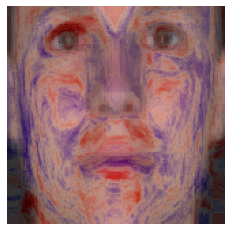

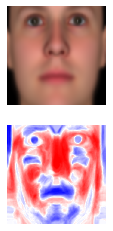

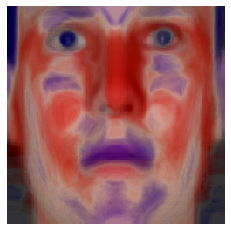

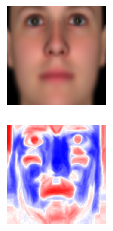

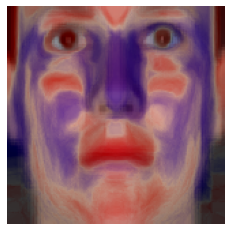

In [586]:
plot_aggregate(explanations_random, images_random, 'random', cmap='bwr')

*Politician Faces*

In [527]:
explanations_politician, images_politician = explain_dir("output/lime/politicians-database_aligned/politicians-database_aligned")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

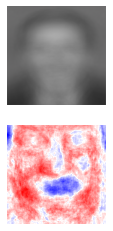

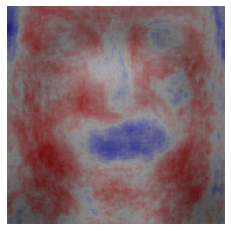

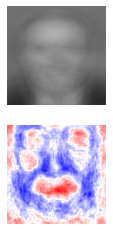

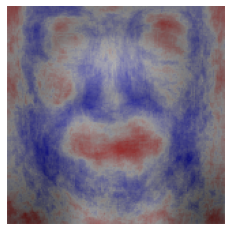

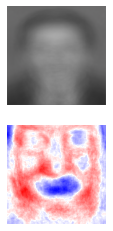

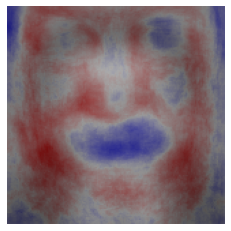

In [587]:
plot_aggregate(explanations_politician, images_politician, 'politicians')